In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sn
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
churn_df = pd.read_csv(
    "Customer_Churn_Dataset.csv",
    index_col=0
)
churn_df["TotalCharges"] = churn_df["TotalCharges"].replace([" "], "0").astype("float")
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [100]:
churn_df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

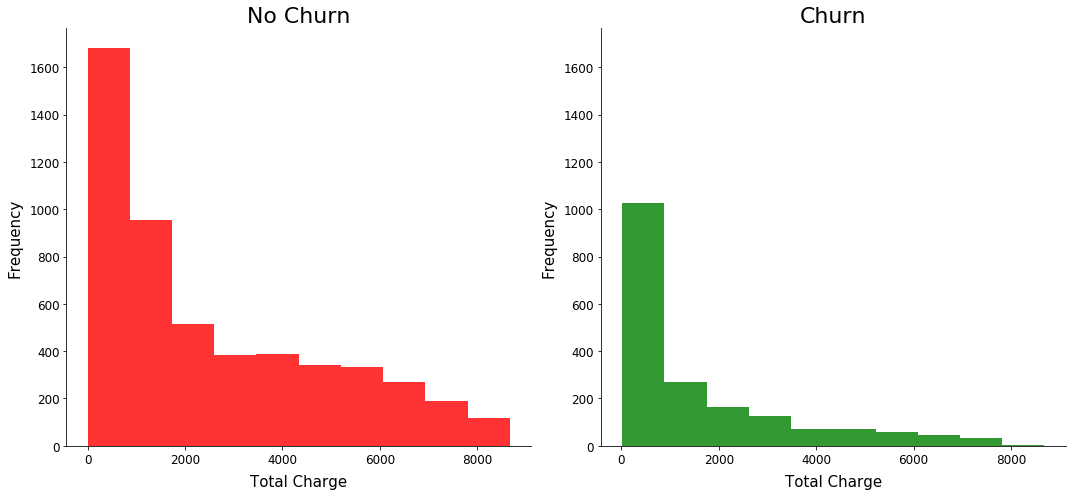

In [76]:
parameter = "tenure"

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
churn_df[churn_df["Churn"] == "No"]["TotalCharges"].plot(
    kind='hist',
    color="Red",
    alpha=.8,
    ax=ax[0]
)
churn_df[churn_df["Churn"] == "Yes"]["TotalCharges"].plot(
    kind='hist',
    color="Green",
    alpha=.8,
    ax=ax[1]
)

ax[0].set_title(
    "No Churn",
    fontdict={
            'fontsize': 22,
            'verticalalignment': 'baseline',
            'horizontalalignment': "center"
        }
)
ax[1].set_title(
    "Churn",
    fontdict={
            'fontsize': 22,
            'verticalalignment': 'baseline',
            'horizontalalignment': "center"
        }
)
if ax[0].get_ylim()[1] > ax[1].get_ylim()[1]:
    ax[1].set_ylim(ax[0].get_ylim())
else:
    ax[0].set_ylim(ax[1].get_ylim())

for axis in ax:
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.yaxis.set_ticks_position('left')
    axis.set_ylabel(
        "Frequency",
        fontdict={
            'fontsize': 15,
            'verticalalignment': 'baseline',
            'horizontalalignment': "center"
        },
        labelpad=10
    )
    axis.set_xlabel(
        "Total Charge",
        fontdict={
            'fontsize': 15,
            'verticalalignment': 'baseline',
            'horizontalalignment': "center"
        },
        labelpad=20
    )
    axis.tick_params(
        axis='y',
        which='both',
        labelsize=12
    )
    axis.tick_params(
        axis='x',
        which='both',
        labelsize=12
    )
plt.tight_layout()
# plt.show()
plt.savefig(
    "TotalCharge.png", 
    bbox_inches="tight"
)

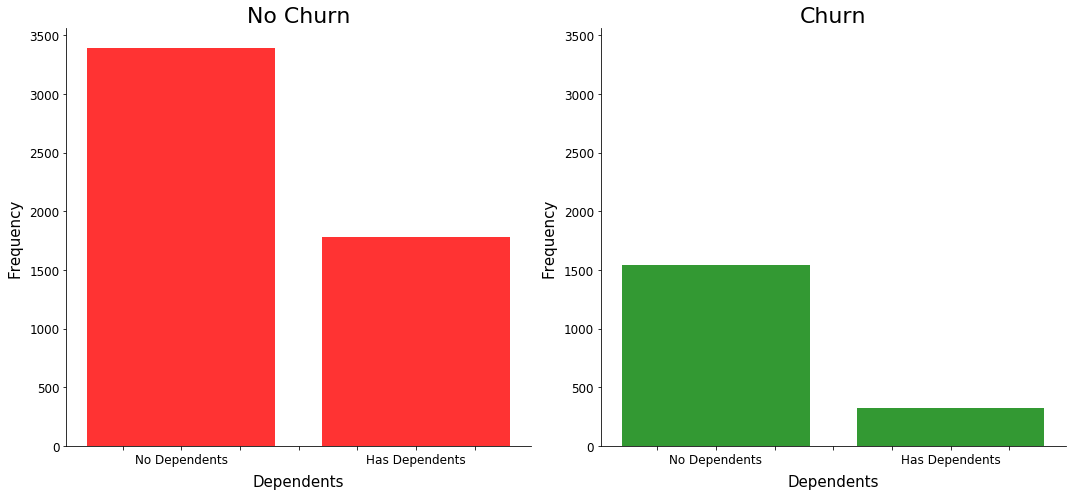

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].bar(
    [0, 1],
    [
        churn_df[
            (churn_df["Churn"] == "No") & 
            (churn_df["Dependents"] == "No")
        ].shape[0],
        churn_df[
            (churn_df["Churn"] == "No") & 
            (churn_df["Dependents"] == "Yes")
        ].shape[0]
    ],
    color="red",
    alpha=.8
)
ax[1].bar(
    [0, 1],
    [
        churn_df[
            (churn_df["Churn"] == "Yes") & 
            (churn_df["Dependents"] == "No")
        ].shape[0],
        churn_df[
            (churn_df["Churn"] == "Yes") & 
            (churn_df["Dependents"] == "Yes")
        ].shape[0]
    ],
    color="green",
    alpha=.8
)
if ax[0].get_ylim()[1] > ax[1].get_ylim()[1]:
    ax[1].set_ylim(ax[0].get_ylim())
else:
    ax[0].set_ylim(ax[1].get_ylim())
ax[0].set_title(
    "No Churn",
    fontdict={
            'fontsize': 22,
            'verticalalignment': 'baseline',
            'horizontalalignment': "center"
        }
)
ax[1].set_title(
    "Churn",
    fontdict={
            'fontsize': 22,
            'verticalalignment': 'baseline',
            'horizontalalignment': "center"
        }
)
for axis in ax:
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.yaxis.set_ticks_position('left')
    axis.set_ylabel(
        "Frequency",
        fontdict={
            'fontsize': 15,
            'verticalalignment': 'baseline',
            'horizontalalignment': "center"
        },
        labelpad=10
    )
    axis.set_xlabel(
        "Dependents",
        fontdict={
            'fontsize': 15,
            'verticalalignment': 'baseline',
            'horizontalalignment': "center"
        },
        labelpad=20
    )
    axis.tick_params(
        axis='y',
        which='both',
        labelsize=12
    )
    axis.tick_params(
        axis='x',
        which='both',
        labelsize=12
    )
    labels = [item.get_text() for item in axis.get_xticklabels()]
    labels[2] = 'No Dependents'
    labels[6] = 'Has Dependents'
    axis.set_xticklabels(labels)
    axis.tick_params(
        axis='y',
        which='both',
        labelsize=12
    )
    axis.tick_params(
        axis='x',
        which='both',
        labelsize=12
    )
    
plt.tight_layout()
# plt.show()
plt.savefig(
    "Dependents.png", 
    bbox_inches="tight"
)

So in order to classify which customers produce churn or not, we can normalize the data in each column to produce a neural network that classifies each customer as churn or not. We can take the following columns and convert them to normalized numbers

1. Gender
    - Male
    - Female
2. Partner
    - 

In [3]:
churn_df = pd.read_csv(
    "Customer_Churn_Dataset.csv",
    index_col=0
)
churn_df["gender"] = churn_df["gender"].astype("category").cat.codes.astype("float")
churn_df["SeniorCitizen"] = churn_df["SeniorCitizen"].astype("category").cat.codes.astype("float")
churn_df["Partner"] = churn_df["Partner"].astype("category").cat.codes.astype("float")
churn_df["Dependents"] = churn_df["Dependents"].astype("category").cat.codes.astype("float")
churn_df["tenure"] = churn_df["tenure"]/72
churn_df["PhoneService"] = churn_df["PhoneService"].astype("category").cat.codes.astype("float")
churn_df["MultipleLines"] = churn_df["MultipleLines"].astype("category").cat.codes/2
churn_df["InternetService"] = churn_df["InternetService"].astype("category").cat.codes/2
churn_df["OnlineSecurity"] = churn_df["OnlineSecurity"].astype("category").cat.codes/2
churn_df["OnlineBackup"] = churn_df["OnlineBackup"].astype("category").cat.codes/2
churn_df["DeviceProtection"] = churn_df["DeviceProtection"].astype("category").cat.codes/2
churn_df["TechSupport"] = churn_df["TechSupport"].astype("category").cat.codes/2
churn_df["StreamingTV"] = churn_df["StreamingTV"].astype("category").cat.codes/2
churn_df["StreamingMovies"] = churn_df["StreamingMovies"].astype("category").cat.codes/2 
churn_df["Contract"] = churn_df["Contract"].astype("category").cat.codes/2
churn_df["PaperlessBilling"] = churn_df["PaperlessBilling"].astype("category").cat.codes.astype("float")
churn_df["PaymentMethod"] = churn_df["PaymentMethod"].astype("category").cat.codes/3
churn_df["MonthlyCharges"] = churn_df["MonthlyCharges"]/118.75
churn_df["TotalCharges"] = churn_df["TotalCharges"].replace([" "], "0")
churn_df["TotalCharges"] = churn_df["TotalCharges"].astype(float)/999.9

# Target
churn_df["Churn"] = churn_df["Churn"].astype("category").cat.codes.astype("float")

In [4]:
x = churn_df[
    [
        "gender",
        "SeniorCitizen",
        "Partner",
        "Dependents",
        "tenure",
        "PhoneService",
        "MultipleLines",
        "InternetService",
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies",
        "Contract",
        "PaperlessBilling",
        "PaymentMethod",
        "MonthlyCharges",
        "TotalCharges"
    ]
].values
Y = churn_df["Churn"].values

In [5]:
from keras import models
from keras import layers
from keras import optimizers
max_epochs = 20
batch = 32

Using TensorFlow backend.


In [6]:
percent_split = .7
train_idx = round(x.shape[0]*percent_split)
x_train = x[:train_idx]
x_val = x[train_idx:]
y_train = Y[:train_idx]
y_val = Y[train_idx:]

In [7]:
model_1 = models.Sequential()
model_1.add(layers.Dense(8, activation = 'relu', input_shape = (19,)))
# model_1.add(layers.Dense(3, activation = 'relu'))
# model_1.add(layers.Dense(3, activation = 'relu'))
model_1.add(layers.Dense(1, activation = 'sigmoid'))
model_1.compile(
    optimizer = optimizers.RMSprop(lr = 0.001), 
    loss = 'binary_crossentropy', 
    metrics = ['accuracy']
)
history_1 = model_1.fit(
    x_train, 
    y_train, 
    epochs = max_epochs, 
    batch_size = batch, 
    validation_data = (x_val, y_val), 
    verbose = 0
)

In [8]:
epochs = range(1, max_epochs + 1)
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
train_accuracy = history_1.history['accuracy']
val_accuracy = history_1.history['val_accuracy']

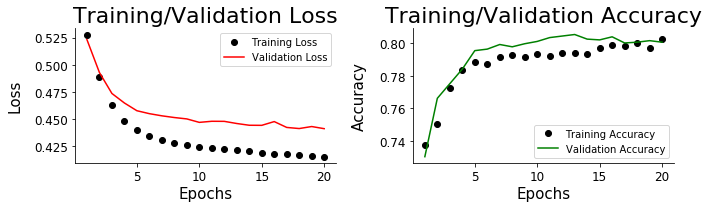

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

ax[0].plot(epochs, train_loss, 'o', color="black", label = "Training Loss")
# ax[0].fill_between(epochs, val_loss, 0, color="red", alpha=0.8)
ax[0].plot(epochs, val_loss, color="red", label="Validation Loss")
ax[0].set_title(
    "Training/Validation Loss",
    fontdict={
        'fontsize': 22,
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
    }
)
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(epochs, train_accuracy, 'o', color="black", label = "Training Accuracy")
ax[1].plot(epochs, val_accuracy, color="green", label = "Validation Accuracy")
ax[1].set_title(
    "Training/Validation Accuracy",
    fontdict={
        'fontsize': 22,
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
    }
)
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

for axis in ax:
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.yaxis.set_ticks_position('left')
    axis.tick_params(
        axis='y',
        which='both',
        labelsize=12
    )
    axis.tick_params(
        axis='x',
        which='both',
        labelsize=12
    )
    axis.set_xlabel(
        axis.get_xlabel(),
        fontdict={
            'fontsize': 15,
            'verticalalignment': 'baseline',
            'horizontalalignment': "center"
        },
        labelpad=15
    )
    axis.set_ylabel(
        axis.get_ylabel(),
        fontdict={
            'fontsize': 15,
            'verticalalignment': 'baseline',
            'horizontalalignment': "center"
        },
        labelpad=15
    )
plt.tight_layout()
plt.show()

In [10]:
ra = model_1.evaluate(x, Y)
ra

7043/7043 [==============================] - 0s 23us/step


[0.4225131112473366, 0.800227165222168]

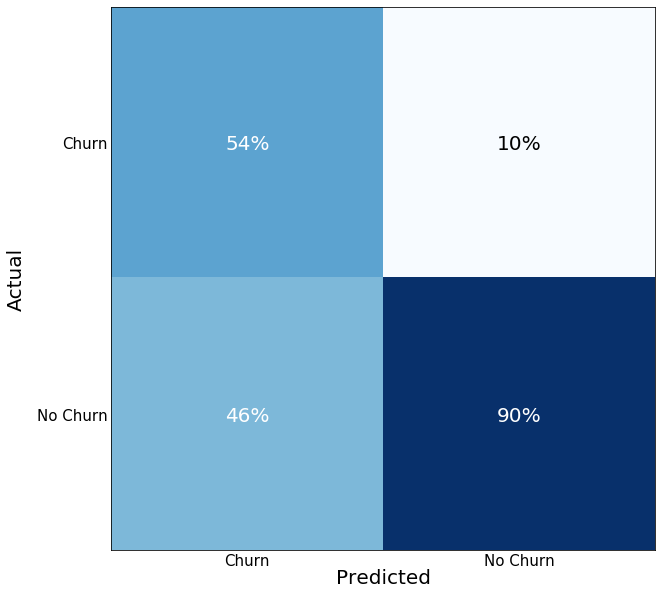

In [120]:
predictions_df = pd.DataFrame(
    {
        "Y":Y,
        "predictions":model_1.predict(x).flatten().round()
    }
)
font_size = 20
churn_correct = predictions_df[
    (predictions_df["Y"] == 1) &
    (predictions_df["predictions"] == 1)
].shape[0] / predictions_df[
    (predictions_df["Y"] == 1)
].shape[0]

nochurn_correct = predictions_df[
    (predictions_df["Y"] == 0) &
    (predictions_df["predictions"] == 0)
].shape[0] / predictions_df[
    (predictions_df["Y"] == 0)
].shape[0]
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
color_map = plt.imshow([
        [churn_correct, 1-nochurn_correct],
        [1-churn_correct, nochurn_correct]
    ])
color_map.set_cmap("Blues")
# plt.colorbar()

ax.set_ylabel(
    "Actual",
    fontdict={
        'fontsize': 20,
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
    },
    labelpad=15
)
ax.set_xlabel(
    "Predicted",
    fontdict={
        'fontsize': 20,
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
    },
    labelpad=15
)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[2] = "Churn"
labels[6] = "No Churn"
ax.set_xticklabels(labels)

labels = [item.get_text() for item in ax.get_yticklabels()]
labels[2] = "Churn"
labels[6] = "No Churn"
ax.set_yticklabels(labels)

ax.text(
    .0,
    .04,
    str(
        round(predictions_df[
            (predictions_df["Y"] == 1) &(predictions_df["predictions"] == 1)
        ].shape[0] / predictions_df[(predictions_df["Y"] == 1)
        ].shape[0]*100)
    ) + "%",
    ha='center',
    va='bottom',
    fontsize=font_size,
    color="white"
) 
ax.text(
    0,
    1.04,
    str(
        round(predictions_df[
            (predictions_df["Y"] == 1) &
            (predictions_df["predictions"] == 0)
        ].shape[0] / predictions_df[(predictions_df["Y"] == 1)
        ].shape[0]*100) 
    )+ "%",
    ha='center',
    va='bottom',
    fontsize=font_size,
    color="white"
) 
ax.text(
    1.0,
    .04,
    str(
        round(predictions_df[
            (predictions_df["Y"] == 0) &
            (predictions_df["predictions"] == 1)
        ].shape[0] / predictions_df[(predictions_df["Y"] == 0)
        ].shape[0]*100) 
    ) + "%",
    ha='center',
    va='bottom',
    fontsize=font_size,
    color="black"
)
ax.text(
    1.0,
    1.04,
    str(
        round(predictions_df[
            (predictions_df["Y"] == 0) &
            (predictions_df["predictions"] == 0)
        ].shape[0] / predictions_df[(predictions_df["Y"] == 0)
        ].shape[0]*100) 
    ) + "%",
    ha='center',
    va='bottom',
    fontsize=font_size,
    color="white"
)

ax.tick_params(
    axis='y',
    which='both',
    length=0,
    labelsize=15
)
ax.tick_params(
    axis='x',
    which='both',
    length=0,
    labelsize=15
)
plt.show()


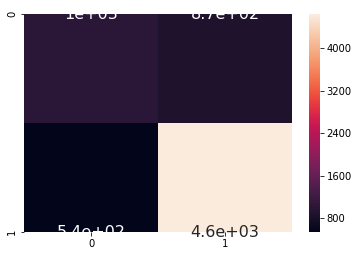

In [89]:
array = [
    [
        predictions_df[
            (predictions_df["Y"] == 1) &
            (predictions_df["predictions"] == 1)
        ].shape[0],
        predictions_df[
            (predictions_df["Y"] == 1) &
            (predictions_df["predictions"] == 0)
        ].shape[0]
    ],
    [
        predictions_df[
            (predictions_df["Y"] == 0) &
            (predictions_df["predictions"] == 1)
        ].shape[0],
        predictions_df[
            (predictions_df["Y"] == 0) &
            (predictions_df["predictions"] == 0)
        ].shape[0]
    ],
]
df_cm = pd.DataFrame(array, range(2), range(2))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
# sn.heatmap(
#     ,
#     annot=True
# )